<a href="https://colab.research.google.com/github/swapnamethraskar/OIBSIP/blob/main/Oasis_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Swapna Methraskar

# **TASK 4**

## EMAIL SPAM DETECTION WITH MACHINE LEARNING

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
df = pd.read_csv("spam.csv", encoding = "latin1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop last 3 columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Renaming the Column names
df.rename(columns = {"v1":"Category", "v2":"Message"}, inplace = True)

In [ ]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
# Converting categorical value into numeric value
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

In [ ]:
df['Category'].unique()

array([0, 1])

In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.duplicated().sum()

403

In [ ]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.Category.value_counts()

0    4516
1     653
Name: Category, dtype: int64

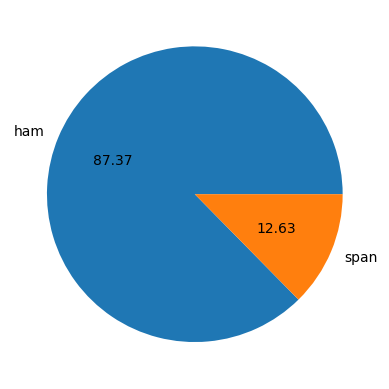

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','span'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk  #natural language toolkit
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#counting number of characters in the message
df["num_characters"]=df["Message"].apply(len)
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#counting number of words in the message
df["num_words"]=df["Message"].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#counting number of sentences in the message
df["num_sentences"]=df["Message"].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#describing for ham
df[df["Category"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#describing for spam
df[df["Category"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


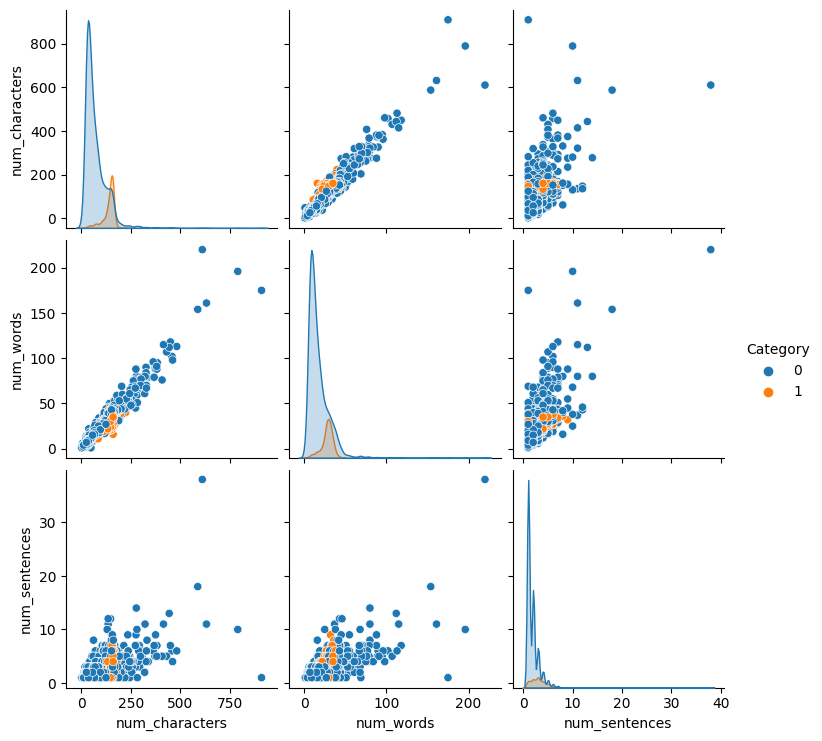

In [ ]:
import seaborn as sns
sns.pairplot(df,hue="Category")

<Axes: >

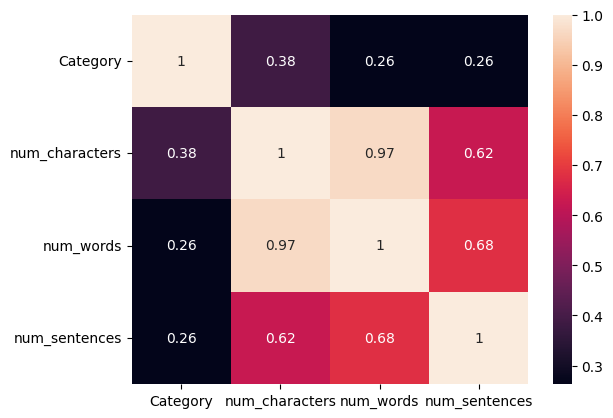

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Data Preprocessing Lower case Tokenization, Removing special characters, Removing stop words and punctuation Stemming

from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer as ps
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    stemmer = ps()
    for i in text:
        y.append(stemmer.stem(i))


    return " ".join(y)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df["Message"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
df["transformed_text"]=df["Message"].apply(transform_text)

In [ ]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

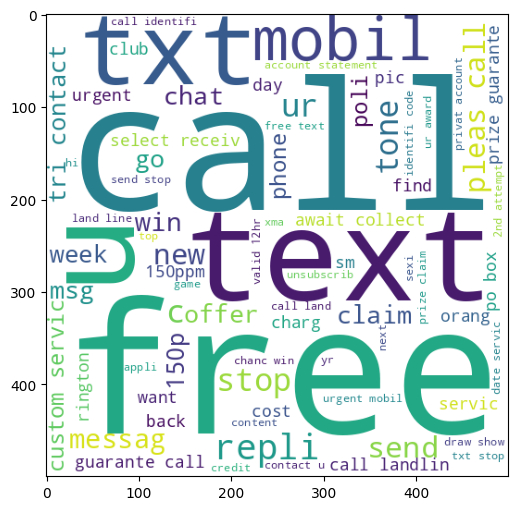

In [ ]:
spam_wc=wc.generate(df[df["Category"]==1]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [ ]:
spam_corpus=[]
for msg in df[df["Category"]==1]["transformed_text"].tolist():
   for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
ham_corpus=[]
for msg in df[df["Category"]==0]["transformed_text"].tolist():
   for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()
y=df["Category"].values

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y.shape

(5169,)

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
g_nb=GaussianNB()
m_nb=MultinomialNB()
b_nb=BernoulliNB()

In [ ]:
g_nb.fit(X_train,y_train)
y_pred1=g_nb.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred1))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred1))
print("Precision Score :",precision_score(y_test,y_pred1))

Accuracy Score : 0.8694390715667312
Confusion Matrix :
 [[788 108]
 [ 27 111]]
Precision Score : 0.5068493150684932


In [ ]:
m_nb.fit(X_train,y_train)
y_pred2=m_nb.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred2))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred2))
print("Precision Score :",precision_score(y_test,y_pred2))

Accuracy Score : 0.9709864603481625
Confusion Matrix :
 [[896   0]
 [ 30 108]]
Precision Score : 1.0


In [ ]:
b_nb.fit(X_train,y_train)
y_pred3=b_nb.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred3))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred3))
print("Precision Score :",precision_score(y_test,y_pred3))

Accuracy Score : 0.9835589941972921
Confusion Matrix :
 [[895   1]
 [ 16 122]]
Precision Score : 0.991869918699187


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'GBDT':gbdt
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.958414
5,GBDT,Accuracy,0.946809
6,DT,Accuracy,0.933269
7,KN,Precision,1.000000
8,NB,Precision,1.000000
9,RF,Precision,0.982906


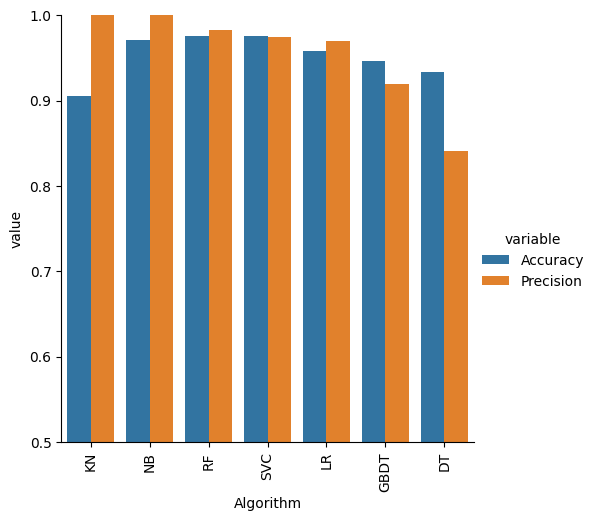

In [ ]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def classify_email(email):
    transformed_email = transform_text(email)
    X_email = tfidf.transform([transformed_email]).toarray()
    prediction = mnb.predict(X_email)
    if prediction[0] == 1:
        return "Spam"
    else:
        return "Ham"

In [ ]:
email = "STOP…with the tension yaar! Guaranteed placements for students in Hyderabad with this course!"
classification = classify_email(email)
print(classification)

Ham


## **Thank You**